# Jawablah poin-poin assignment berikut
#### perhatikan dengan baik apa yang diminta pada soal

# 1. Anda bekerja sebagai seorang data scientist, atasan anda mengirimkan anda data kepada anda dan meminta untuk memberikan analisa dengan menggunakan :
- semua metode pada proses Exploratory Data Analysis. Lakukan proses Feature Engineering terlebih dahulu dan mengecek secara teliti pada tiap kolom data sembari melakukan data understanding. **(20 Poin)**

**Data Dictionary** <br>
File `ecommerce.csv` berisi berbagai kolom, masing-masing mewakili atribut yang berbeda dari data penjualan. Berikut adalah deskripsi singkat dari setiap kolom:

| Nama Kolom         |Deskripsi                                         |
|--------------------|--------------------------------------------------|
| InvoiceNo          | Nomor faktur yang mengidentifikasi transaksi     |
| StockCode          | Kode produk yang dijual                          |
| Description        | Deskripsi produk yang dijual                     |
| Quantity           | Jumlah produk yang dibeli dalam transaksi        |
| InvoiceDate        | Tanggal dan waktu transaksi dilakukan            |
| UnitPrice          | Harga per unit produk yang dibeli                |
| CustomerID         | ID unik yang mengidentifikasi pelanggan          |
| Country            | Negara tempat pelanggan berasal                  |

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
data = pd.read_csv('/content/ecommerce.csv')
# data -> for EDA process

In [ ]:
# Showing top 5 rows of the data
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,5/25/2011 17:31,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,7/24/2011 11:58,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,7/19/2011 12:54,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,7/13/2011 11:34,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2/20/2011 12:23,0.85,17811,United Kingdom


In [ ]:
# Showing bottom 5 rows of the data
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4865,571883,23263,SET OF 3 WOODEN HEART DECORATIONS,1,10/19/2011 13:58,1.25,14704,United Kingdom
4866,545530,21922,UNION STRIPE WITH FRINGE HAMMOCK,12,3/3/2011 13:45,6.95,17416,United Kingdom
4867,540458,21125,SET 6 FOOTBALL CELEBRATION CANDLES,12,1/7/2011 12:28,1.25,12501,Germany
4868,574289,22999,TRAVEL CARD WALLET VINTAGE LEAF,24,11/3/2011 15:16,0.42,17750,United Kingdom
4869,547413,21700,BIG DOUGHNUT FRIDGE MAGNETS,12,3/23/2011 9:43,0.85,13475,United Kingdom


In [ ]:
# sample 5 rows of the data
# the results change everytime the code is executed (random sample)
data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
273,538518,22973,CHILDREN'S CIRCUS PARADE MUG,6,12/12/2010 16:14,1.65,14505,United Kingdom
780,569232,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,5,10/2/2011 15:26,0.39,16667,United Kingdom
1290,578079,23569,TRADTIONAL ALPHABET STAMP SET,4,11/22/2011 16:26,4.95,13985,United Kingdom
2695,572913,22505,MEMO BOARD COTTAGE DESIGN,1,10/26/2011 16:21,4.95,15993,United Kingdom
2077,560504,22630,DOLLY GIRL LUNCH BOX,12,7/19/2011 11:47,1.95,13081,United Kingdom


Observations:
1. columns Quantity, and UnitPrice, are numeric but will confirm later
2. colums StockCode, Description, Country are cardinal, but will confirm later

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    4870 non-null   int64  
 1   StockCode    4870 non-null   object 
 2   Description  4870 non-null   object 
 3   Quantity     4870 non-null   int64  
 4   InvoiceDate  4870 non-null   object 
 5   UnitPrice    4870 non-null   float64
 6   CustomerID   4870 non-null   int64  
 7   Country      4870 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 304.5+ KB


Observations:
1. Data contains 8 columns with 4870 rows
2. All columns have no missing values, but will be confirmed later
3. All data types (except InvoiceNo, InvoiceDate, and CustomerID) appear OK, given the appropriate column names

In [ ]:
#mengubah data type kolum InvoiceNo dan CustomerID menjadi object, karena merupakan nilai unique dan bukan masuk kedalam perhitungan numerik
data['InvoiceNo'] = data['InvoiceNo'].astype(str)
data['CustomerID'] = data['CustomerID'].astype(str)

#mengubah data type kolum InvoiceDate menjadi datetime
data['InvoiceDate'] = pd.to_datetime(data["InvoiceDate"],format="%m/%d/%Y %H:%M")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    4870 non-null   object        
 1   StockCode    4870 non-null   object        
 2   Description  4870 non-null   object        
 3   Quantity     4870 non-null   int64         
 4   InvoiceDate  4870 non-null   datetime64[ns]
 5   UnitPrice    4870 non-null   float64       
 6   CustomerID   4870 non-null   object        
 7   Country      4870 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 304.5+ KB


In [ ]:
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom


All data types appear OK, given the appropriate column names

In [ ]:
# Statistical summary for numericals colums
numericals = ['Quantity', 'UnitPrice'] # group column names based on type
data[numericals].describe()

,Quantity,UnitPrice
count,4870.000000,4870.000000
mean,12.945791,2.937057
std,38.145988,4.744515
min,1.000000,0.040000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,992.000000,145.000000


Observation:
* Overall, the minimum and maximum values make sense for each column
* Mean !~ 50% (Median) in Quantity and UnitPrice columns, indicating non symmetrical distribution

In [ ]:
#describe method for categorical colums
categoricals = ['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country'] # group column names based on type
data[categoricals].describe()

,InvoiceNo,StockCode,Description,CustomerID,Country
count,4870,4870,4870,4870,4870
unique,3804,1773,1807,1932,31
top,562046,85099B,JUMBO BAG RED RETROSPOT,17841,United Kingdom
freq,8,24,24,112,4346


Observations:
* `InvoiceNo` has 3084 unique values, with the most frequent InvoiceNo being 562046, which appears 8 times
* `StockCode` has 1773 unique values, and the most frequent StockCode is 85099B, appearing 24 times. This indicates that 85099B is a popular product that is frequently purchased.
* `Description` has 1807 unique values, and the most frequent Description is JUMBO BAG RED RETROSPECT, which appears 24 times. This product is highly popular, making it the top-selling item in the dataset.
* `CustomerID` has 1932 unique values, with 17841 being the most frequent CustomerID, appearing 112 times. This shows that this particular customer is very active, making multiple purchases.
* `Country` has 31 unique values, with United Kingdom being the most frequent country, appearing 4346 times. This suggests that most of the customers in this dataset are from the United Kingdom.

In [ ]:
#cek duplicate data
len(data.drop_duplicates()) / len(data)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

No duplicate !

In [ ]:
# Identifying missing value with isna
data.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
# Identifying missing value with value counts
for col in data.columns:
    print(f"===={col}====")
    print(data[col].value_counts())
    display()

Streaming output truncated to the last 5000 lines.
2011-11-22 13:02:00    1
2011-09-02 11:34:00    1
2011-04-07 12:30:00    1
2011-05-06 10:32:00    1
2010-12-07 14:57:00    1
2011-11-22 15:05:00    1
2011-02-28 14:45:00    1
2011-07-03 12:22:00    1
2011-06-15 12:21:00    1
2010-12-06 11:26:00    1
2011-05-24 09:10:00    1
2011-08-25 13:46:00    1
2011-03-01 12:26:00    1
2011-10-27 10:51:00    1
2010-12-12 11:44:00    1
2011-11-04 10:47:00    1
2011-04-27 14:43:00    1
2011-01-10 13:22:00    1
2011-01-09 11:54:00    1
2011-11-13 14:20:00    1
2011-09-23 13:12:00    1
2010-12-09 11:28:00    1
2011-08-08 12:15:00    1
2011-10-17 14:01:00    1
2011-09-14 14:09:00    1
2011-07-21 17:09:00    1
2011-05-09 15:48:00    1
2011-04-13 10:32:00    1
2011-11-17 17:34:00    1
2011-07-20 11:07:00    1
2011-03-30 15:51:00    1
2011-11-17 11:02:00    1
2011-08-08 13:42:00    1
2011-05-16 15:34:00    1
2010-12-02 13:32:00    1
2011-12-06 11:06:00    1
2011-02-11 15:12:00    1
2010-12-14 15:50:00    1

after checking with isna and check one by one, there are no missing values but there are incorrect values in colums Country and Description

In [ ]:
# Handling Country with Modus
mode_country = data['Country'].mode()[0]
mode_country

'United Kingdom'

In [ ]:
# replace value
data['Country'] = data['Country'].replace({'Unspecified':'United Kingdom'})
data['Country'].value_counts()

,count
Country,
United Kingdom,4350
Germany,121
EIRE,90
France,89
Switzerland,28
Netherlands,26
Spain,25
Belgium,21
Portugal,16


In [ ]:
# Handling Description with Modus
mode_description = data['Description'].mode()[0]
# Replace value
data['Description'] = data['Description'].replace({'Manual':'JUMBO BAG RED RETROSPOT','Next Day Carriage':'JUMBO BAG RED RETROSPOT'})
data['Description'].value_counts()

,count
Description,
JUMBO BAG RED RETROSPOT,30
PARTY BUNTING,22
REGENCY CAKESTAND 3 TIER,21
WHITE HANGING HEART T-LIGHT HOLDER,19
60 TEATIME FAIRY CAKE CASES,18
SET OF 3 CAKE TINS PANTRY DESIGN,16
SET OF 4 PANTRY JELLY MOULDS,16
JAM MAKING SET PRINTED,15
ASSORTED COLOUR BIRD ORNAMENT,15


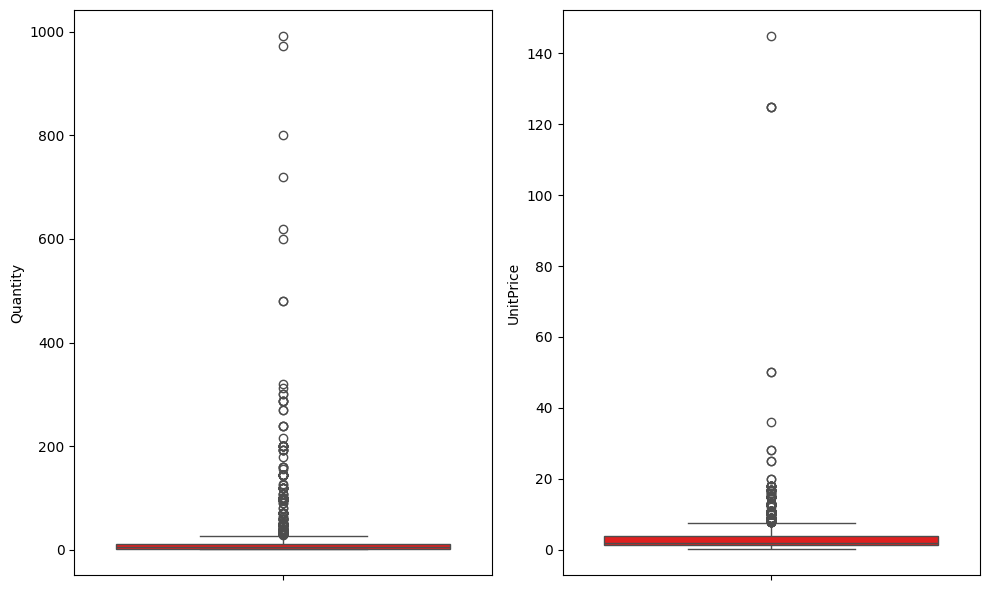

In [ ]:
#Identifying outlier with boxplot
# adjust the figure size for better readability
plt.figure(figsize=(10,6))

# plotting
features = ['Quantity', 'UnitPrice']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='red')
    plt.tight_layout()

In [ ]:
# check values of quantity colum, Are the existing values ​​still reasonable?
data['Quantity'].value_counts()

,count
Quantity,
1,930
12,705
2,678
4,417
6,414
3,347
24,299
10,267
8,132


In [ ]:
# check values of unitprice colum, Are the existing values ​​still reasonable?
data['UnitPrice'].value_counts()

,count
UnitPrice,
1.25,527
1.65,440
0.85,334
2.95,330
0.42,294
2.10,233
4.95,228
3.75,225
2.08,198


Outlier masih masuk akal, karena nilai `Quantity` yang tinggi mungkin menunjukkan bahwa pelanggan membeli dalam jumlah besar untuk tujuan jual kembali, sementara nilai `UnitPrice` yang tinggi bisa mewakili produk premium yang dijual tanpa diskon. Oleh karena itu, tidak perlu ditangani secara khusus, karena mereka mencerminkan kondisi transaksi yang normal

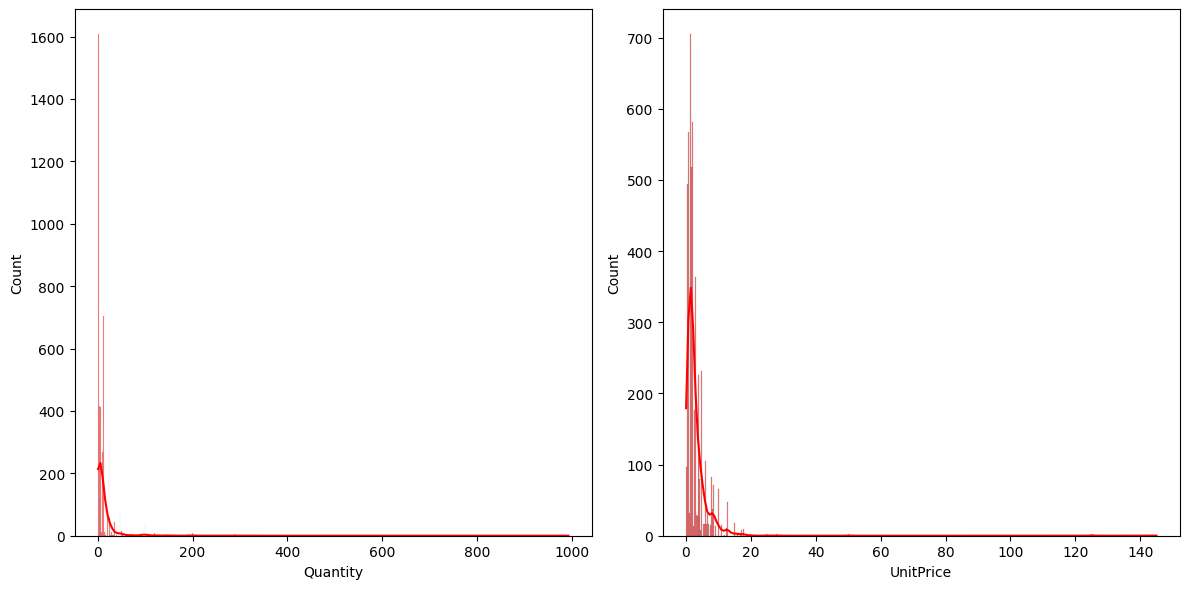

In [ ]:
#KDE plot for knowing the distribution form
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    #plt.subplot(2, len(features) // 2 + (len(features) % 2), i+1)
    plt.subplot(1, len(features)//2 + 1, i+1)
    sns.histplot(x=data[features[i]], color='red', kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

* Distribusi grafik pada data `Quantity` dan `UnitPrice adalah positively skewed
* Quantity: Mayoritas banyaknya unit terjual terkonsentrasi pada nilai rendah, dengan beberapa berada jauh lebih tinggi, kemungkinan besar terkait dengan pembelian grosir.
* UnitPrice: Nilai harga per unit mayoritas juga terpusat pada nilai yang lebih rendah, namun ada lonjakan yang menunjukkan adanya produk premium dengan harga lebih tinggi.

# 2. Setelah melakukan feature engineering, Ikuti anjuran berikut :
- Buat 5 pertanyaan analisa
- jawab dengan pendekatan metode data manipulation (sorting, filtering, group by, pivot, melt, crosstab, working with datetime, dsb (sesuaikan dengan keperluan anda
- Buatlah visualisasi grafik supaya mempermudah dalam ekstraksi insight setelah menjawab menggunakan metode data manipulation diatas
- Tulis insight anda

`poin` :
- insight / observation : **10 poin (1 pertanyaan 2 poin)**
- pertanyaan analisis dan jawaban metode data manipulation : **30 poin (1 pertanyaan 7 poin)**
- data visualisasi : **30 poin (1 visualisasi dari 1 pertanyaan 7 poin)**

pertanyaan : <br>
1. Bagaimana tren pendapatan (revenue) tahun 2011?
2. Apa saja produk terlaris ditahun 2011 dan 2010 dan bagaimana tren produk tersebut?
3. Negara mana saja yang menghasilkan total pendapatan (revenue) terbesar?
4. Customer mana saja yang menghasilkan total pendapatan (revenue) terbesar?
5. Pada waktu apa transaksi paling tinggi terjadi di tiga negara dengan kontribusi transaksi terbesar?


In [ ]:
# Ekstraksi Hari dalam Seminggu
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()
# Ekstraksi Bulan
data['MonthofYear'] = data['InvoiceDate'].dt.month_name()
# Ekstraksi Bulan berupa angka
data['Month'] = data['InvoiceDate'].dt.month
# Ekstraksi Tahun
data['Year'] = data['InvoiceDate'].dt.year
# Ekstraksi Time
data['Time'] = data['InvoiceDate'].dt.time

data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek,MonthofYear,Month,Year,Time
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom,Wednesday,May,5,2011,17:31:00
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom,Sunday,July,7,2011,11:58:00


In [ ]:
#Pembahasan soal 1. Bagaimana tren pendapatan (revenue) tahun 2011?
#membuat kolum Total
data['Total'] = data['Quantity']*data['UnitPrice']
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek,MonthofYear,Month,Year,Time,Total
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom,Wednesday,May,5,2011,17:31:00,2.08
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom,Sunday,July,7,2011,11:58:00,5.10


In [ ]:
#melakukan filtering tahun 2011
filter_2011 = data[data['Year']==2011]
filter_2011.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek,MonthofYear,Month,Year,Time,Total
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom,Wednesday,May,5,2011,17:31:00,2.08
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom,Sunday,July,7,2011,11:58:00,5.10
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom,Tuesday,July,7,2011,12:54:00,1.65
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom,Wednesday,July,7,2011,11:34:00,15.00
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom,Sunday,February,2,2011,12:23:00,2.55


In [ ]:
# Mengelompokkan berdasarkan bulan dan menghitung total penjualan
total_penjualan_2011 = filter_2011.groupby(['Month','MonthofYear'])['Total'].sum().reset_index().sort_values(by='Month', ascending=True)
total_penjualan_2011

,Month,MonthofYear,Total
0,1,January,6247.52
1,2,February,6152.46
2,3,March,7162.64
3,4,April,6357.63
4,5,May,6987.24
5,6,June,7203.93
6,7,July,7569.27
7,8,August,9904.91
8,9,September,9761.11
9,10,October,10177.38


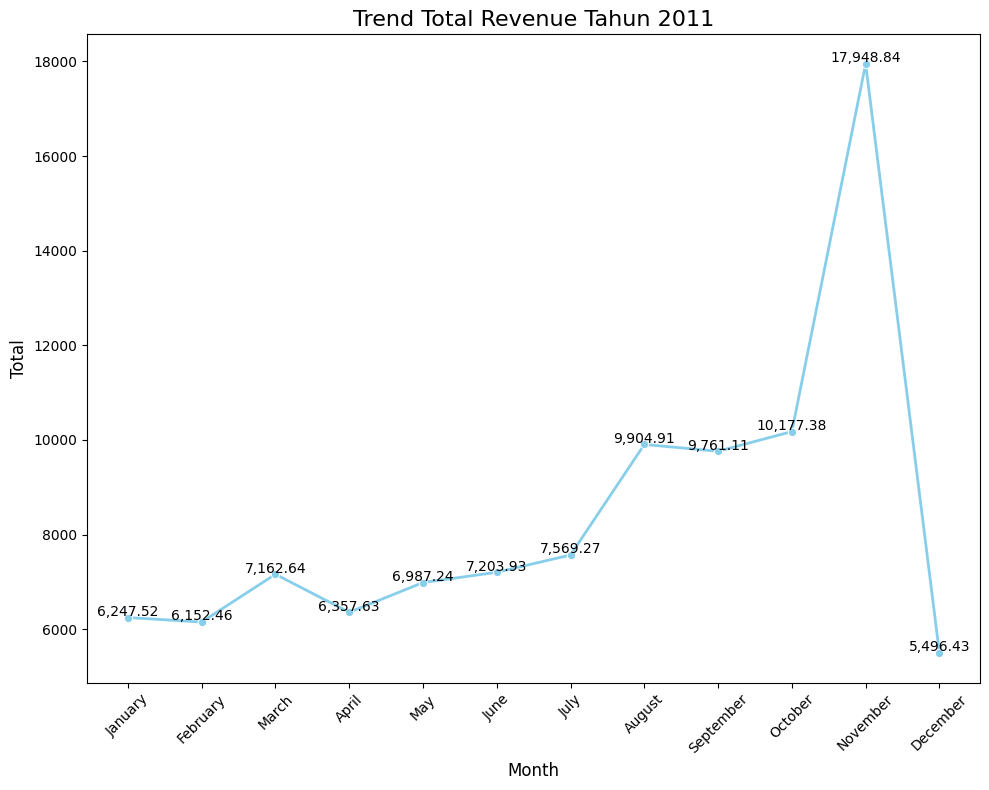

In [ ]:
# Visualisasi lineplot
plt.figure(figsize=(10, 8))
sns.lineplot(data=total_penjualan_2011, x="MonthofYear", y="Total", marker="o", color="skyblue", linewidth=2)

# Menambahkan angka di setiap titik (Opsional)
for i, total in enumerate(total_penjualan_2011["Total"]):
    plt.text(i, total + (0.002 * (total_penjualan_2011["Total"]).max()), f"{total:,.2f}",
             ha="center", fontsize=10, color="black")

# Menambahkan judul dan label
plt.title("Trend Total Revenue Tahun 2011", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()  # Menghindari elemen terpotong
plt.show()

**insight / observation :** Grafik menunjukkan pendapatan yang cukup stabil dengan sedikit fluktuasi di bulan-bulan awal tahun 2011. Namun, terjadi lonjakan drastis pada bulan November, diikuti oleh penurunan yang cukup tajam pada bulan Desember. Perusahaan sebaiknya menganalisis lebih dalam penyebab lonjakan pada bulan November, seperti promosi atau faktor musiman, dan mempertimbangkan strategi untuk menjaga stabilitas agar tidak terjadi penurunan tajam seperti bulan Desember.

In [ ]:
#Pembahasan soal 2. Apa saja produk terlaris ditahun 2011 dan 2010 dan bagaimana tren produk tersebut?
# Membuat pivot table
pivot_tabel = pd.pivot_table(data, values='Quantity', index='Description', columns='Year', aggfunc='sum', fill_value=0)

In [ ]:
# Menampilkan 5 produk terlaris pada tahun 2010
top_5_item_2010 = pivot_tabel[2010].sort_values(ascending=False).head(5)

# Menampilkan 5 produk terlaris pada tahun 2011
top_5_item_2011 = pivot_tabel[2011].sort_values(ascending=False).head(5)

top_5_item_2010, top_5_item_2011

(Description
 CREAM HEART CARD HOLDER     972
 BLACK RECORD COVER FRAME    487
 SLEEPING CAT ERASERS        300
 LOVE HEART POCKET WARMER    270
 BLUE POLKADOT WRAP          200
 Name: 2010, dtype: int64,
 Description
 WHITE HANGING HEART T-LIGHT HOLDER    1279
 JUMBO BAG RED RETROSPOT               1072
 WRAP, BILLBOARD FONTS DESIGN           825
 MIRROR MOSAIC T-LIGHT HOLDER           720
 ASSORTED COLOURS SILK FAN              648
 Name: 2011, dtype: int64)

In [ ]:
#melakukan filtering
filter_top_produk = pivot_tabel[pivot_tabel.index.isin(top_5_item_2010.index)|pivot_tabel.index.isin(top_5_item_2011.index)]
filter_top_produk

Year,2010,2011
Description,,
ASSORTED COLOURS SILK FAN,0,648
BLACK RECORD COVER FRAME,487,49
BLUE POLKADOT WRAP,200,25
CREAM HEART CARD HOLDER,972,60
JUMBO BAG RED RETROSPOT,18,1072
LOVE HEART POCKET WARMER,270,0
MIRROR MOSAIC T-LIGHT HOLDER,0,720
SLEEPING CAT ERASERS,300,61
WHITE HANGING HEART T-LIGHT HOLDER,12,1279


In [ ]:
# Menggabungkan kolum 2011 dan 2010 menjadi kolum Year kembali
top_5_item_melted = pd.melt(filter_top_produk.reset_index(),
                              id_vars=['Description'],
                              value_vars=[2010, 2011],
                              var_name='Year',
                              value_name='Total Quantity')
top_5_item_melted

,Description,Year,Total Quantity
0,ASSORTED COLOURS SILK FAN,2010,0
1,BLACK RECORD COVER FRAME,2010,487
2,BLUE POLKADOT WRAP,2010,200
3,CREAM HEART CARD HOLDER,2010,972
4,JUMBO BAG RED RETROSPOT,2010,18
5,LOVE HEART POCKET WARMER,2010,270
6,MIRROR MOSAIC T-LIGHT HOLDER,2010,0
7,SLEEPING CAT ERASERS,2010,300
8,WHITE HANGING HEART T-LIGHT HOLDER,2010,12
9,"WRAP, BILLBOARD FONTS DESIGN",2010,0


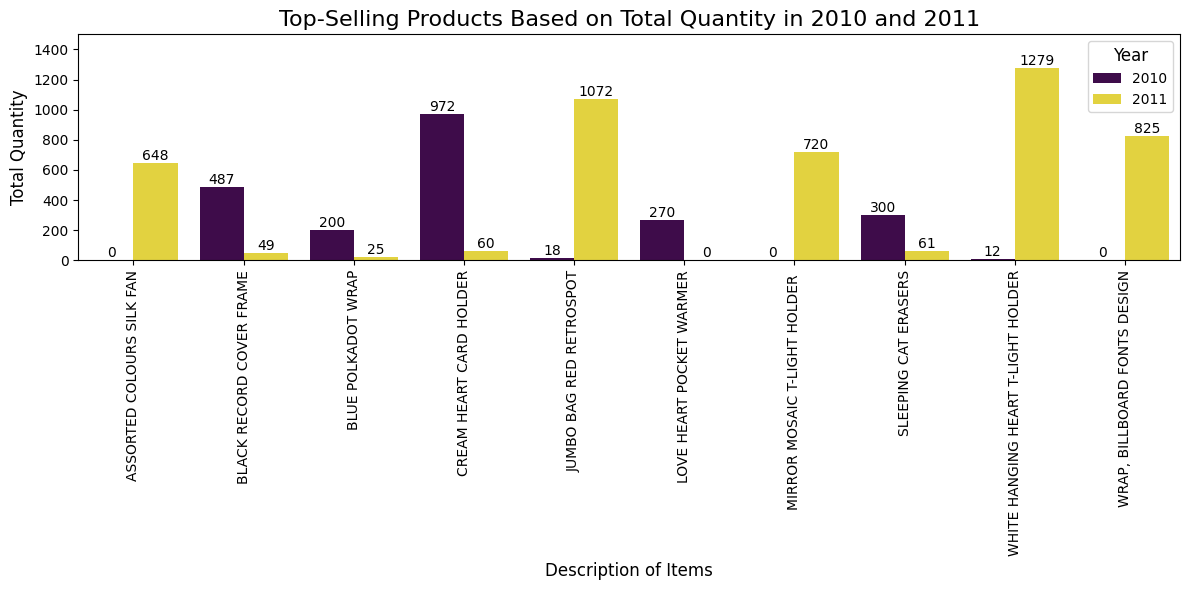

In [ ]:
# Visualisasi grouped barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_5_item_melted, x='Description', y='Total Quantity', hue='Year', palette='viridis')

# Adding number labels to each bar
for s in ax.containers: #ax.containers hanya untuk barchart
    ax.bar_label(s, fmt='%.0f')

# Tambahkan judul dan label
plt.title('Top-Selling Products Based on Total Quantity in 2010 and 2011', fontsize=16)
plt.xlabel('Description of Items', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(bottom=0, top=1500) #menset batas atas dan bawah sumbu y

# Tambahkan legenda
plt.legend(title='Year', fontsize=10, title_fontsize=12)
# legenda berkaitan dengan hue, dalam hal ini hue nya ialah year

plt.tight_layout()  # Menghindari elemen terpotong
plt.show()

**insight/observation :** <br>
* Produk Terlaris: Beberapa produk menunjukkan peningkatan penjualan signifikan dari 2010 ke 2011, seperti WRAP, BILLBOARD FONTS DESIGN, WHITE HANGING HEART T-LIGHT HOLDER, MIRROR MOSAIC T-LIGHT HOLDER, JUMBO BAG RED RETROSPOT, ASSORTED COLOURS SILK FAN yang menunjukkan bahwa permintaan produk ini meningkat pada tahun kedua.
* Penurunan Penjualan: Produk seperti BLACK RECORD COVER FRAME, BLUE POLKADOT WRAP, CREAM HEART CARD HOLDER, LOVE HEART POCKET WARMER, SLEEPING CAT ERASERS mengalami penurunan jumlah penjualan, yang bisa dipengaruhi oleh beberapa faktor antara lain tren atau perubahan preferensi pasar, atau kualitas barang

<ipython-input-32-871096b5f833>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Country", y="Total", data=top_country, palette="viridis")


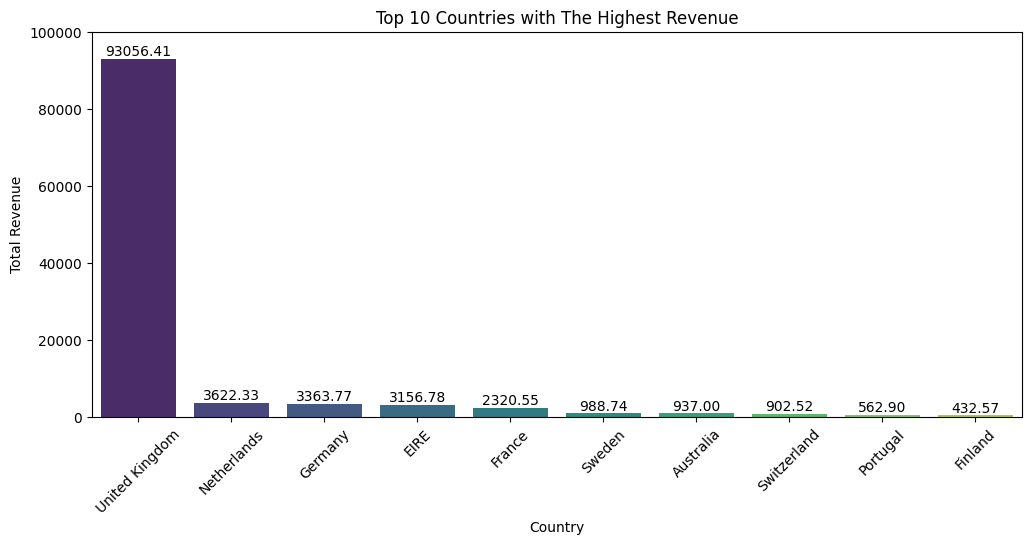

In [ ]:
#Pembahasan Soal 3. Negara mana saja yang menghasilkan total pendapatan (revenue) terbesar?
#Mengelompokkan berdasarkan Country dan melakukan agg sum pada kolum Total
top_country = data.groupby("Country")["Total"].sum().reset_index()
#Menampilkan 10 data top country
top_country = top_country.sort_values(by="Total", ascending=False).head(10)

#Melakukan visualisasi
plt.figure(figsize=(12,5))
ax = sns.barplot(x="Country", y="Total", data=top_country, palette="viridis")

# Adding number labels to each bar
for s in ax.containers: #ax.containers hanya untuk barchart
    ax.bar_label(s, fmt='%.2f')

plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.title("Top 10 Countries with The Highest Revenue")
plt.ylim(bottom=0, top=100000)
plt.xticks(rotation=45)
plt.show()

**insight/observation :** United Kingdom mendominasi pendapatan dengan kontribusi yang jauh lebih tinggi dibandingkan negara lainnya. Negara dengan pendapatan besar sebaiknya mempertahankan strategi yang telah berhasil, sementara negara dengan kontribusi kecil perlu memperkuat riset pasar dan meningkatkan distribusi produk untuk memaksimalkan potensi pendapatan.

<ipython-input-33-cd7dca4676b1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="CustomerID", y="Total", data=top_customer, palette="pastel")


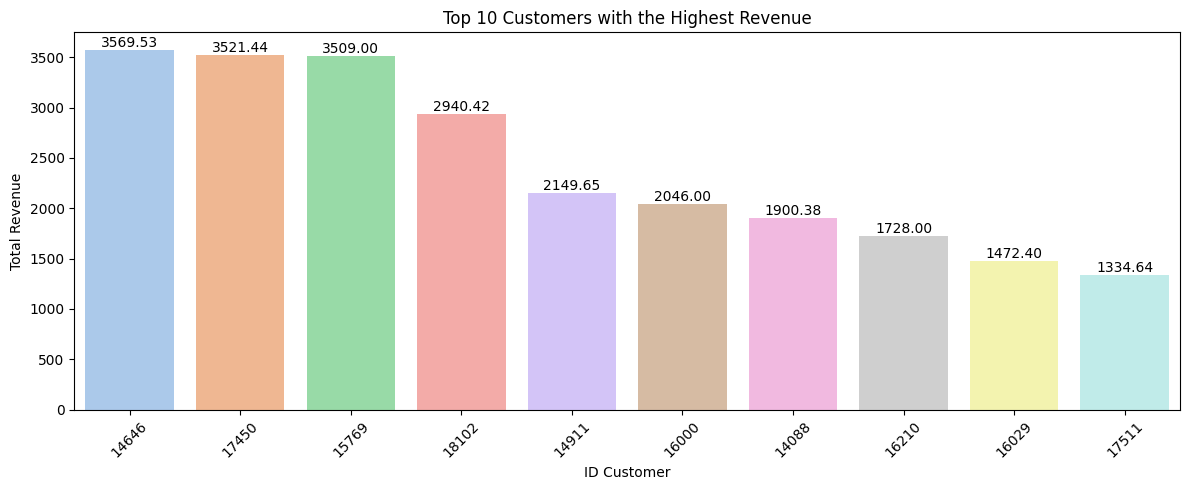

In [ ]:
#Pembahasan Soal 4. Customer mana saja yang menghasilkan total pendapatan (revenue) terbesar?
# Menghitung total pendapatan per CustomerID
top_customer = data.groupby("CustomerID")["Total"].sum().reset_index()

# Mengurutkan berdasarkan total revenue (pendapatan)
top_customer = top_customer.sort_values(by="Total", ascending=False).head(10)

# Membuat visualisasi bar chart untuk 10 customer dengan total revenue tertinggi
plt.figure(figsize=(12, 5))
ax = sns.barplot(x="CustomerID", y="Total", data=top_customer, palette="pastel")

# Adding number labels to each bar
for s in ax.containers: #ax.containers hanya untuk barchart
    ax.bar_label(s, fmt='%.2f')

plt.xlabel("ID Customer")
plt.ylabel("Total Revenue")
plt.title("Top 10 Customers with the Highest Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**insight / observation :** Top 10 customer yang menghasilkan revenue tertinggi (CustomeriID : 14646, 17450, 15,679, 18102, 14911, 16000, 14088, 16210, 16029, 17511) menunjukkan kontribusi besar terhadap total pendapatan perusahaan, yang mungkin disebabkan oleh pembelian dalam jumlah besar atau frekuensi pembelian yang tinggi walaupun terlihat kesenjangan antar pelanggan cukup signifikan. Untuk menjaga loyalitas pelanggan, perusahaan sebaiknya memberikan reward berupa diskon, atau layanan personal, serta memahami kebutuhan dan preferensi customer guna memperkuat hubungan jangka panjang.

In [ ]:
#Pembahasan soal 5. Pada waktu apa transaksi paling tinggi terjadi di tiga negara dengan kontribusi transaksi terbesar?
# Fungsi untuk mengkategorikan waktu
def categorize_time(time):
    if time >= pd.to_datetime('05:00:00').time() and time < pd.to_datetime('12:00:00').time():
        return 'Morning'
    elif time >= pd.to_datetime('12:00:00').time() and time < pd.to_datetime('15:00:00').time():
        return 'Afternoon'
    elif time >= pd.to_datetime('15:00:00').time() and time < pd.to_datetime('18:00:00').time():
        return 'Evening'
    else:
        return 'Night'

data['TimeofTheDay'] = data['Time'].apply(categorize_time)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek,MonthofYear,Month,Year,Time,Total,TimeofTheDay
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom,Wednesday,May,5,2011,17:31:00,2.08,Evening
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom,Sunday,July,7,2011,11:58:00,5.10,Morning
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom,Tuesday,July,7,2011,12:54:00,1.65,Afternoon
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom,Wednesday,July,7,2011,11:34:00,15.00,Morning
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom,Sunday,February,2,2011,12:23:00,2.55,Afternoon


In [ ]:
# Menggunakan crosstab untuk menghitung jumlah transaksi per Country dan TimeofTheDay
transaction_by_time = pd.crosstab(data['Country'], data['TimeofTheDay'], values=data['InvoiceNo'], aggfunc='count').fillna(0)
transaction_by_time['Total Transaction'] = transaction_by_time.sum(axis=1)
top_3_transaction_by_time = transaction_by_time.sort_values(by='Total Transaction', ascending=False).reset_index().head(3)
top_3_transaction_by_time

TimeofTheDay,Country,Afternoon,Evening,Morning,Night,Total Transaction
0,United Kingdom,2161.0,922.0,1182.0,85.0,4350.0
1,Germany,52.0,17.0,51.0,1.0,121.0
2,EIRE,40.0,11.0,38.0,1.0,90.0


In [ ]:
# Menggabungkan kolum Afternoon, Evening, Morning, Night menjadi kolum Time kembali
top_3_transaction_by_time_melted = pd.melt(top_3_transaction_by_time,
                                          id_vars=['Country'],
                                          value_vars=['Morning', 'Afternoon', 'Evening', 'Night'],
                                          var_name='TimeofTheDay',
                                          value_name='Total_Transaction')
top_3_transaction_by_time_melted

,Country,TimeofTheDay,Total_Transaction
0,United Kingdom,Morning,1182.0
1,Germany,Morning,51.0
2,EIRE,Morning,38.0
3,United Kingdom,Afternoon,2161.0
4,Germany,Afternoon,52.0
5,EIRE,Afternoon,40.0
6,United Kingdom,Evening,922.0
7,Germany,Evening,17.0
8,EIRE,Evening,11.0
9,United Kingdom,Night,85.0


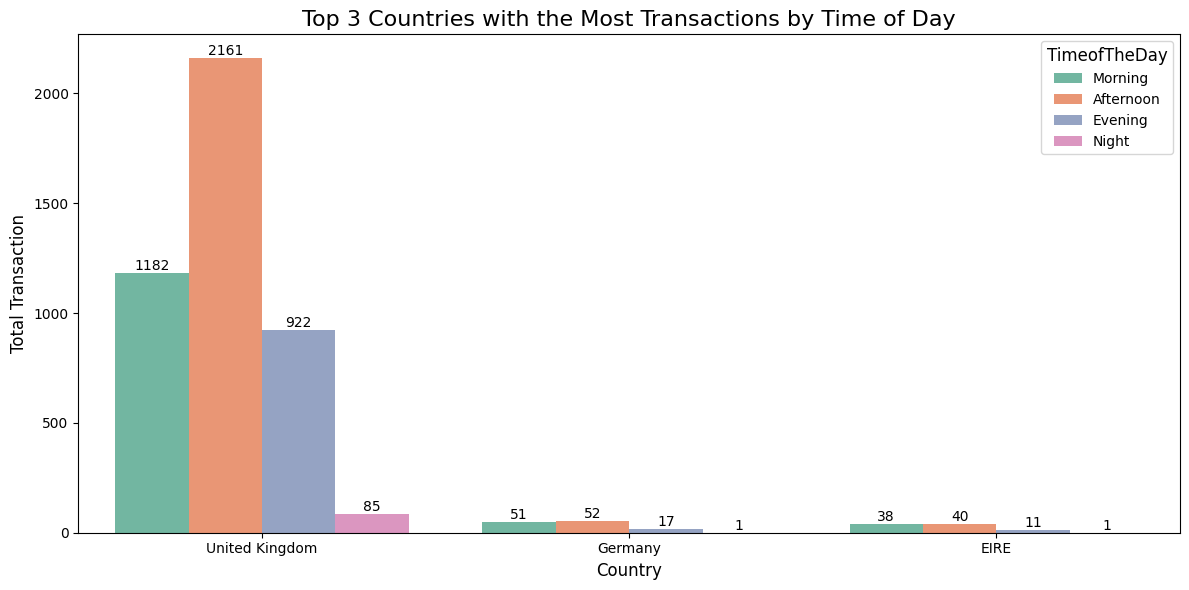

In [ ]:
# Visualisasi grouped barplot
plt.figure(figsize=(12, 6))
# Changed 'pallete' to 'palette'
ax = sns.barplot(data=top_3_transaction_by_time_melted, x='Country', y='Total_Transaction', hue='TimeofTheDay', palette="Set2")

# Adding number labels to each bar
for s in ax.containers: #ax.containers hanya untuk barchart
    ax.bar_label(s, fmt='%.0f')

# Tambahkan judul dan label
plt.title('Top 3 Countries with the Most Transactions by Time of Day', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Transaction', fontsize=12)
plt.xticks(rotation=0)

# Tambahkan legenda
plt.legend(title='TimeofTheDay', fontsize=10, title_fontsize=12)
# legenda berkaitan dengan hue, dalam hal ini hue nya ialah TimeofTheDay

plt.tight_layout()  # Menghindari elemen terpotong
plt.show()

**Insight/Observation**: United Kingdom memiliki transaksi terbanyak pada sore hari, sementara Jerman dan EIRE cenderung bertransaksi lebih banyak pada pagi dan siang hari. Hal ini mungkin disebabkan oleh kebiasaan atau pola konsumsi di masing-masing negara yang berhubungan dengan waktu. Untuk meningkatkan transaksi, perusahaan bisa menyesuaikan strategi pemasaran dan promosi berdasarkan waktu-waktu puncak transaksi di setiap negara.

## 3. Lakukan analisa multivariate pada kolom numerikal berupa :
- Correlation Heatmap + insight / observation **(10 poin)**

<Axes: title={'center': 'Correlation Heatmap'}>

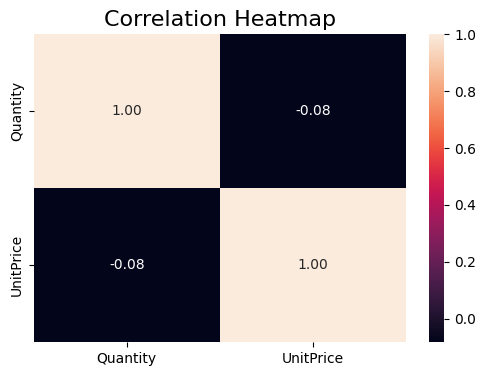

In [ ]:
# correlation heatmap
plt.figure(figsize=(6,4))
plt.title('Correlation Heatmap', fontsize=16)
correlation = data[numericals].corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Dari heatmap di atas, terlihat bahwa hubungan antara Quantity dan UnitPrice sangat lemah, dengan nilai korelasi -0.08. Hal ini menunjukkan bahwa perubahan dalam jumlah barang yang dibeli tidak secara signifikan memengaruhi harga satuan produk.